In [1]:
import pandas as pd 

In [3]:
data=pd.read_csv("C:\\Users\\AKASH SINGH YADAV\\Downloads\\disney_plus_titles.csv")

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1368 entries, 0 to 1367
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       1368 non-null   object
 1   type          1368 non-null   object
 2   title         1368 non-null   object
 3   director      928 non-null    object
 4   cast          1194 non-null   object
 5   country       1193 non-null   object
 6   date_added    1365 non-null   object
 7   release_year  1368 non-null   int64 
 8   rating        1366 non-null   object
 9   duration      1368 non-null   object
 10  listed_in     1368 non-null   object
 11  description   1368 non-null   object
dtypes: int64(1), object(11)
memory usage: 128.4+ KB


In [7]:
data.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,A Spark Story,"Jason Sterman, Leanne Dare","Apthon Corbin, Louis Gonzales",NaN,"September 24, 2021",2021,TV-PG,88 min,Documentary,Two Pixar filmmakers strive to bring their uni...
1,s2,Movie,Spooky Buddies,Robert Vince,"Tucker Albrizzi, Diedrich Bader, Ameko Eks Mas...","United States, Canada","September 24, 2021",2011,G,93 min,"Comedy, Fantasy, Kids",The puppies go on a spooky adventure through a...
2,s3,Movie,The Fault in Our Stars,Josh Boone,"Shailene Woodley, Ansel Elgort, Laura Dern, Sa...",United States,"September 24, 2021",2014,PG-13,127 min,"Coming of Age, Drama, Romance",Hazel and Gus share a love that sweeps them on...


In [9]:
data.columns.values

array(['show_id', 'type', 'title', 'director', 'cast', 'country',
       'date_added', 'release_year', 'rating', 'duration', 'listed_in',
       'description'], dtype=object)

In [11]:
data.isnull().sum()

show_id           0
type              0
title             0
director        440
cast            174
country         175
date_added        3
release_year      0
rating            2
duration          0
listed_in         0
description       0
dtype: int64

In [103]:
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from textblob import TextBlob
from sklearn.cluster import KMeans

In [27]:
#Time Series Analysis

In [31]:
data['release_year'] = pd.to_datetime(data['release_year'], format='%Y', errors='coerce')

In [33]:
data= data.dropna(subset=['release_year'])

In [35]:
release_per_year = data['release_year'].dt.year.value_counts().sort_index()

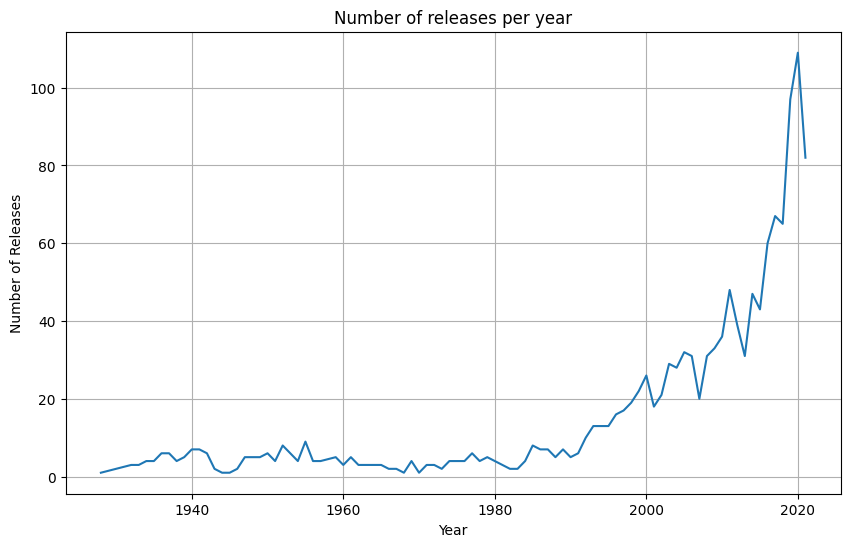

In [37]:
plt.figure(figsize=(10,6))
release_per_year.plot(kind='line')
plt.title('Number of releases per year')
plt.xlabel('Year')
plt.ylabel('Number of Releases')
plt.grid(True)
plt.show()

In [41]:
data['description'] = data['description'].astype(str)

In [45]:
def get_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity , blob.sentiment.subjectivity

In [47]:
data['sentiment'] = data['description'].apply(lambda x: get_sentiment(x)[0])
data['subjectivity'] = data['description'].apply(lambda x: get_sentiment(x)[1])

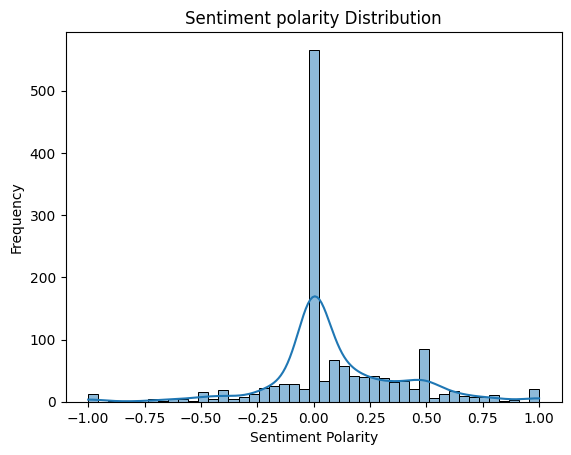

In [49]:
sns.histplot(data['sentiment'], kde=True)
plt.title('Sentiment polarity Distribution')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.show()

In [119]:
vectorizer = TfidfVectorizer(stop_words='english')
X= vectorizer.fit_transform(data['description'])

In [125]:
kmeans = KMeans(n_clusters=5, random_state=42, n_init='auto')
data['cluster'] = kmeans.fit_predict(X)

In [127]:
pca = PCA(n_components=2, random_state=42)

In [129]:
X_pca = pca.fit_transform(X.toarray())

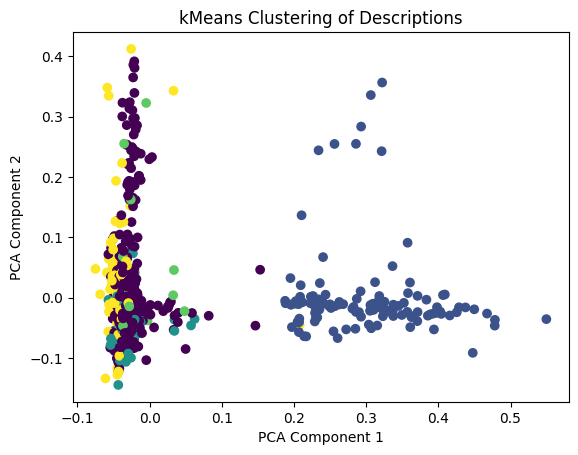

In [131]:
plt.scatter(X_pca[:, 0], X_pca[:,1], c=data['cluster'], cmap='viridis')
plt.title('kMeans Clustering of Descriptions')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

In [133]:
print(data.head())
print(data.columns)

  show_id     type                           title  \
0      s1    Movie                   A Spark Story   
1      s2    Movie                  Spooky Buddies   
2      s3    Movie          The Fault in Our Stars   
3      s4  TV Show                 Dog: Impossible   
4      s5  TV Show  Spidey And His Amazing Friends   

                     director  \
0  Jason Sterman, Leanne Dare   
1                Robert Vince   
2                  Josh Boone   
3                         NaN   
4                         NaN   

                                                cast                country  \
0                      Apthon Corbin, Louis Gonzales                    NaN   
1  Tucker Albrizzi, Diedrich Bader, Ameko Eks Mas...  United States, Canada   
2  Shailene Woodley, Ansel Elgort, Laura Dern, Sa...          United States   
3                                       Matt Beisner          United States   
4  Benjamin Valic, Lily Sanfelippo, Jakari Fraser...          United States   

 

In [135]:
data['release_year'] = data['release_year'].dt.year

In [137]:
selected_features = ['release_year', 'rating', 'cluster']

In [139]:
data_selected = data[selected_features].dropna()

In [141]:
data_selected['rating'] = data_selected['rating'].astype('category').cat.codes

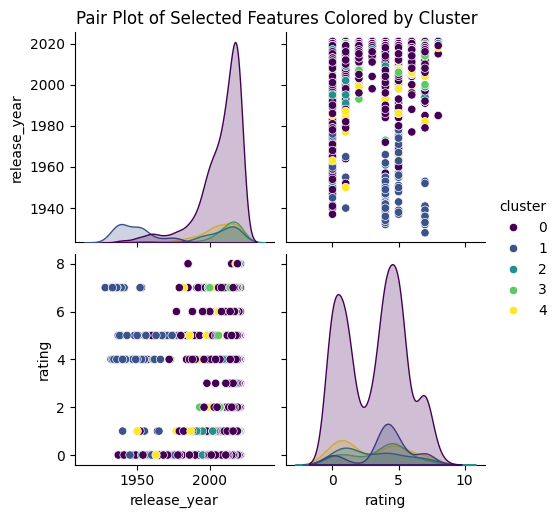

In [147]:
sns.pairplot(data_selected, hue='cluster', palette='viridis', diag_kind = 'kde')
plt.suptitle('Pair Plot of Selected Features Colored by Cluster', y=1.02)
plt.show()